# REACT Study Analysis

Using [data](https://github.com/mrc-ide/reactidd/tree/master/inst/extdata) from the [REACT Github repository](https://github.com/mrc-ide/reactidd) to identify periodic trends in Covid-19 case data.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import fftpack

import periodic_sampling as ps

In [20]:
# Read in and format data

tot_df = pd.read_csv('total.csv')
pos_df = pd.read_csv('positive.csv')

for df in [tot_df, pos_df]:
    df.rename(columns={df.columns.values[0]: 'Date'}, inplace=True)
    df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
    df['Combined'] = df.sum(axis=1, numeric_only=True)
    df = ps.analysis.rel_reporting_calc(df, ['Combined'])
    df["Days"] = df["Date"].apply(lambda date: (date - min(df["Date"])).days)

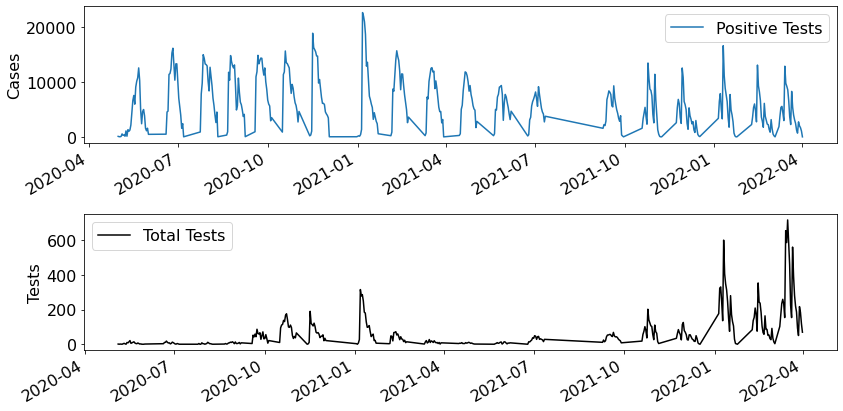

In [16]:
plt.rcParams['font.size'] = '16'
fig, axs = plt.subplots(2, 1, figsize=(12,6))

plot1 = tot_df.plot.line('Date', 'Combined', ax=axs[0], color='tab:blue', label='Positive Tests')
axs[0].set_xlabel(''); axs[0].set_ylabel('Cases')

plot2 = pos_df.plot.line('Date', 'Combined', ax=axs[1], color='black', label = 'Total Tests')
axs[1].set_xlabel(''); axs[1].set_ylabel('Tests')

fig.patch.set_facecolor('white') ; fig.tight_layout()
# plt.savefig(f"../images/react_survey/cases_over_time.png")

Note there are a number of gaps in the data - we will ignore these in subsequent analysis

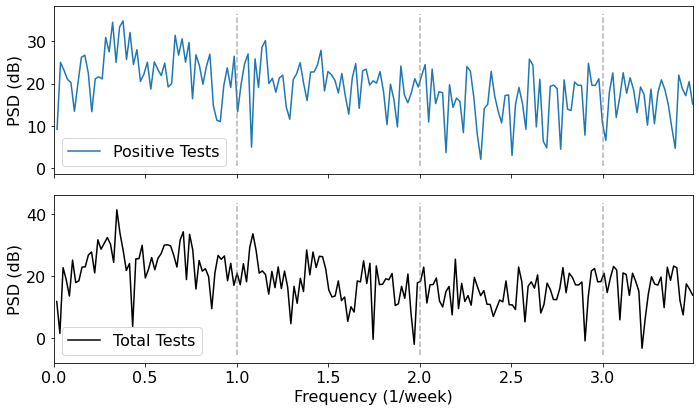

In [28]:
plt.rcParams['font.size'] = '16'
fig, axs = plt.subplots(2, 1, figsize=(10,6))

case_fft_pub, case_freq_pub = ps.analysis.fourier_transform(pos_df, column='Dif_Combined', compute_psd=True)
ps.analysis.plot_fft(case_fft_pub, case_freq_pub, ax=axs[0], color='tab:blue', label="Positive Tests")
axs[0].set_xlabel(''); axs[0].set_xticklabels([])

test_fft_pub, test_freq_pub = ps.analysis.fourier_transform(tot_df, column='Dif_Combined', compute_psd=True)
ps.analysis.plot_fft(test_fft_pub, test_freq_pub, ax=axs[1], color='black', label="Total Tests")

fig.patch.set_facecolor('white'); fig.tight_layout()
# plt.savefig(f"../images/react_survey/daily_fft_cases_tests.png")


In [38]:
total_half = tot_df.copy(); pos_half = pos_df.copy()
total_half.rename(columns={'Combined': 'Total Cases'}, inplace = True)
pos_half.rename(columns={'Combined': 'Positive Cases'}, inplace = True)
df = pd.merge(
    left = total_half[['Date', 'Total Cases']],
    right = pos_half[['Date', 'Positive Cases']],
    on = 'Date',
    how = 'outer'
)

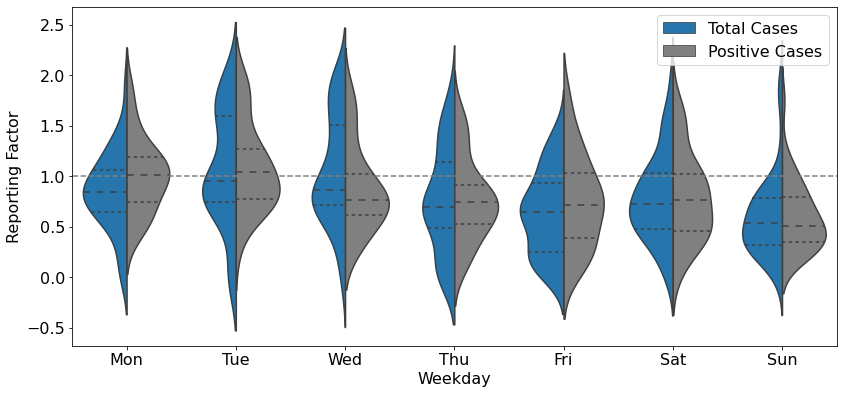

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ps.analysis.rel_reporting_violin(df.copy(), ['Total Cases', 'Positive Cases'],  ax=ax, cutoff=2,
                   colors=['tab:blue', 'grey'], labels=["Total Cases", "Positive Cases"])  

for i in range(2):
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  
plt.xlabel('Weekday'); ax.set_ylabel("Reporting Factor"); 
plt.suptitle(''); fig.patch.set_facecolor('white'); plt.tight_layout()
# plt.savefig(f"../images/uk_phe_data/daily_violin_cases_deaths.png")